In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
num_samples_per_class = 1_000
# Generate the first class of points: 1,000 random 2D points.
# conv=[(1, 0.5, [0.5, 1]] corresponds to an oval-like point
# cloud oriented from bottom left to top right
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
# Generate the other class of points with a different mean and
# the same convariance matrix.
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [17]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [30]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))

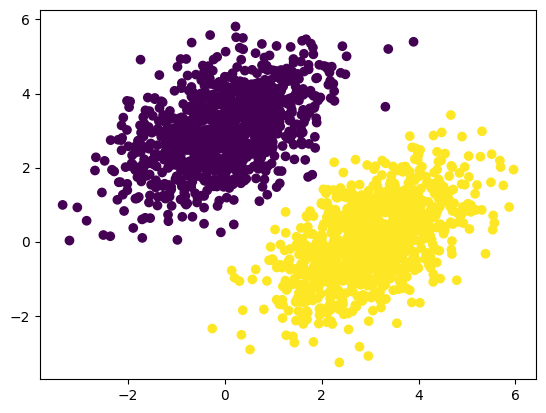

In [19]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [28]:
# `(prediction = W • input + b)`

input_dim = 2
output_dim =1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [21]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [22]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [23]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # update the weights given the loss
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [24]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.0132
Loss at step 1: 0.4768
Loss at step 2: 0.1743
Loss at step 3: 0.1283
Loss at step 4: 0.1150
Loss at step 5: 0.1065
Loss at step 6: 0.0991
Loss at step 7: 0.0925
Loss at step 8: 0.0865
Loss at step 9: 0.0810
Loss at step 10: 0.0760
Loss at step 11: 0.0715
Loss at step 12: 0.0673
Loss at step 13: 0.0635
Loss at step 14: 0.0601
Loss at step 15: 0.0570
Loss at step 16: 0.0541
Loss at step 17: 0.0515
Loss at step 18: 0.0492
Loss at step 19: 0.0470
Loss at step 20: 0.0450
Loss at step 21: 0.0432
Loss at step 22: 0.0416
Loss at step 23: 0.0401
Loss at step 24: 0.0388
Loss at step 25: 0.0376
Loss at step 26: 0.0364
Loss at step 27: 0.0354
Loss at step 28: 0.0345
Loss at step 29: 0.0336
Loss at step 30: 0.0329
Loss at step 31: 0.0322
Loss at step 32: 0.0315
Loss at step 33: 0.0309
Loss at step 34: 0.0304
Loss at step 35: 0.0299
Loss at step 36: 0.0295
Loss at step 37: 0.0291
Loss at step 38: 0.0287
Loss at step 39: 0.0284


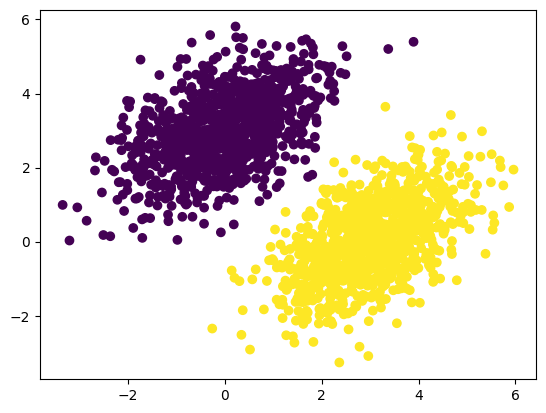

In [25]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

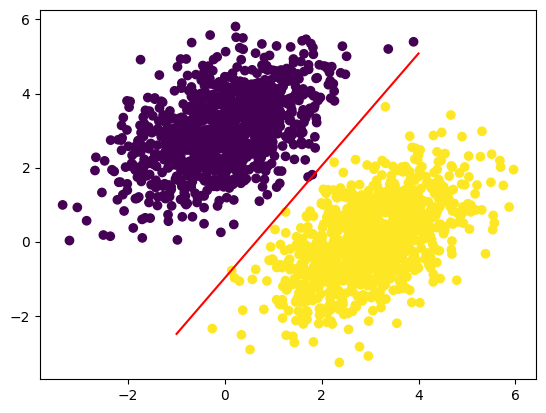

In [26]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)